<a href="https://colab.research.google.com/github/Suyash1266/profanity-detection/blob/main/Profanity_Detectors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# load the dataset
import pandas as pd

data = pd.read_csv('https://raw.githubusercontent.com/Suyash1266/profanity-detection/main/clean_data.csv')
data.head()

,is_offensive,text
0,0,Then go to the village pump and suggest they c...
1,1,ANTI GREEK NATIONALIS -WIKIPEDIA \n\nHi Alexik...
2,1,Dis hoe wasnt dis violent on Lottery Ticket 😂😂
3,0,It is better for Atabay not helping the banned...
4,0,"""is in CamelCase. """"SiCKO"""" is not CamelCase,..."


In [5]:
data.shape

(184354, 2)

In [6]:
print('Offensive instances in data:',data[data['is_offensive'] == 1].shape[0])
print('Not offensive instances in data:',data[data['is_offensive'] == 0].shape[0])

Offensive instances in data: 36845
Not offensive instances in data: 147509


In [7]:
texts = data['text'].astype(str)
y = data['is_offensive']

# Method 1
Using Bag of Words Vectorization for Preprocessing words and applying classical classifcation algorithms

In [93]:
from sklearn.feature_extraction.text import CountVectorizer

# Vectorize the text
vectorizer = CountVectorizer(stop_words='english', min_df=0.0001)
X = vectorizer.fit_transform(texts)

In [9]:
# split the training and testing data
from sklearn.model_selection import train_test_split

trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.3, random_state = 42)

In [11]:
# cross validation function
from sklearn.model_selection import cross_validate
def cross_validation(model, _X, _y, _cv=5):
      '''Function to perform 5 Folds Cross-Validation
       Parameters
       ----------
      model: Python Class, default=None
              This is the machine learning algorithm to be used for training.
      _X: array
           This is the matrix of features.
      _y: array
           This is the target variable.
      _cv: int, default=5
          Determines the number of folds for cross-validation.
       Returns
       -------
       The function returns a dictionary containing the metrics 'accuracy', 'precision',
       'recall', 'f1' for both training set and validation set.
      '''
      _scoring = ['accuracy', 'precision', 'recall', 'f1']
      results = cross_validate(estimator=model,
                               X=_X,
                               y=_y,
                               cv=_cv,
                               scoring=_scoring)
      
      return {"Validation Accuracy scores": results['test_accuracy'],
              "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
              "Validation Precision scores": results['test_precision'],
              "Mean Validation Precision": results['test_precision'].mean(),
              "Validation Recall scores": results['test_recall'],
              "Mean Validation Recall": results['test_recall'].mean(),
              "Validation F1 scores": results['test_f1'],
              "Mean Validation F1 Score": results['test_f1'].mean()
              }

In [12]:
# train the classifiers
from sklearn.svm import LinearSVC

svc_clf = LinearSVC(class_weight="balanced", dual=False, tol=1e-2, max_iter=int(1e5))
svc_clf_score = cross_validation(svc_clf, X, y)

In [13]:
print(svc_clf_score)

{'Validation Accuracy scores': array([0.95169646, 0.95126251, 0.94952673, 0.94844186, 0.95039327]), 'Mean Validation Accuracy': 95.02641663815663, 'Validation Precision scores': array([0.86772835, 0.86276042, 0.85636646, 0.85213807, 0.8643778 ]), 'Mean Validation Precision': 0.8606742188669717, 'Validation Recall scores': array([0.89469399, 0.89917221, 0.89808658, 0.89781517, 0.89170851]), 'Mean Validation Recall': 0.896295291084272, 'Validation F1 scores': array([0.88100488, 0.88059007, 0.87673048, 0.87438049, 0.87783047]), 'Mean Validation F1 Score': 0.878107278257861}


In [14]:
# decision trees
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(min_samples_split=5)
dt_clf_score = cross_validation(dt_clf, X, y)

In [15]:
print(dt_clf_score)

{'Validation Accuracy scores': array([0.94309891, 0.94437363, 0.94214966, 0.94271921, 0.94361269]), 'Mean Validation Accuracy': 94.31908199543993, 'Validation Precision scores': array([0.8699986 , 0.86838459, 0.85804158, 0.86613735, 0.86931025]), 'Mean Validation Precision': 0.8663744718455855, 'Validation Recall scores': array([0.84095535, 0.85059031, 0.85140453, 0.84380513, 0.84489076]), 'Mean Validation Recall': 0.8463292169900937, 'Validation F1 scores': array([0.85523047, 0.85939535, 0.85471017, 0.85482541, 0.85692657]), 'Mean Validation F1 Score': 0.8562175939902069}


In [16]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=50)
rt_clf_score = cross_validation(rf_clf, X, y)

In [17]:
print(rt_clf_score)

{'Validation Accuracy scores': array([0.94966234, 0.95248298, 0.95180494, 0.95085569, 0.95098996]), 'Mean Validation Accuracy': 95.11591819585297, 'Validation Precision scores': array([0.91936711, 0.92341324, 0.92184671, 0.92117629, 0.92315886]), 'Mean Validation Precision': 0.9217924407281334, 'Validation Recall scores': array([0.820057  , 0.83118469, 0.82914914, 0.82467092, 0.82331388]), 'Mean Validation Recall': 0.8256751255258516, 'Validation F1 scores': array([0.86687706, 0.87487502, 0.87304422, 0.87025634, 0.87038233]), 'Mean Validation F1 Score': 0.8710869932127914}


In [18]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='saga', class_weight='balanced', max_iter=int(1e6))
lr_clf_score = cross_validation(lr_clf, X, y)

In [19]:
print(lr_clf_score)

{'Validation Accuracy scores': array([0.92213393, 0.9237341 , 0.9237341 , 0.92151013, 0.92432872]), 'Mean Validation Accuracy': 92.30881957566788, 'Validation Precision scores': array([0.76242707, 0.76350179, 0.76313662, 0.75810359, 0.76982911]), 'Mean Validation Precision': 0.7633996364509554, 'Validation Recall scores': array([0.88668747, 0.89591532, 0.89672954, 0.89184421, 0.88641607]), 'Mean Validation Recall': 0.8915185235445786, 'Validation F1 scores': array([0.81987578, 0.82442557, 0.82455703, 0.81955356, 0.82401917]), 'Mean Validation F1 Score': 0.8224862222589794}


In [34]:
import numpy as np

def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

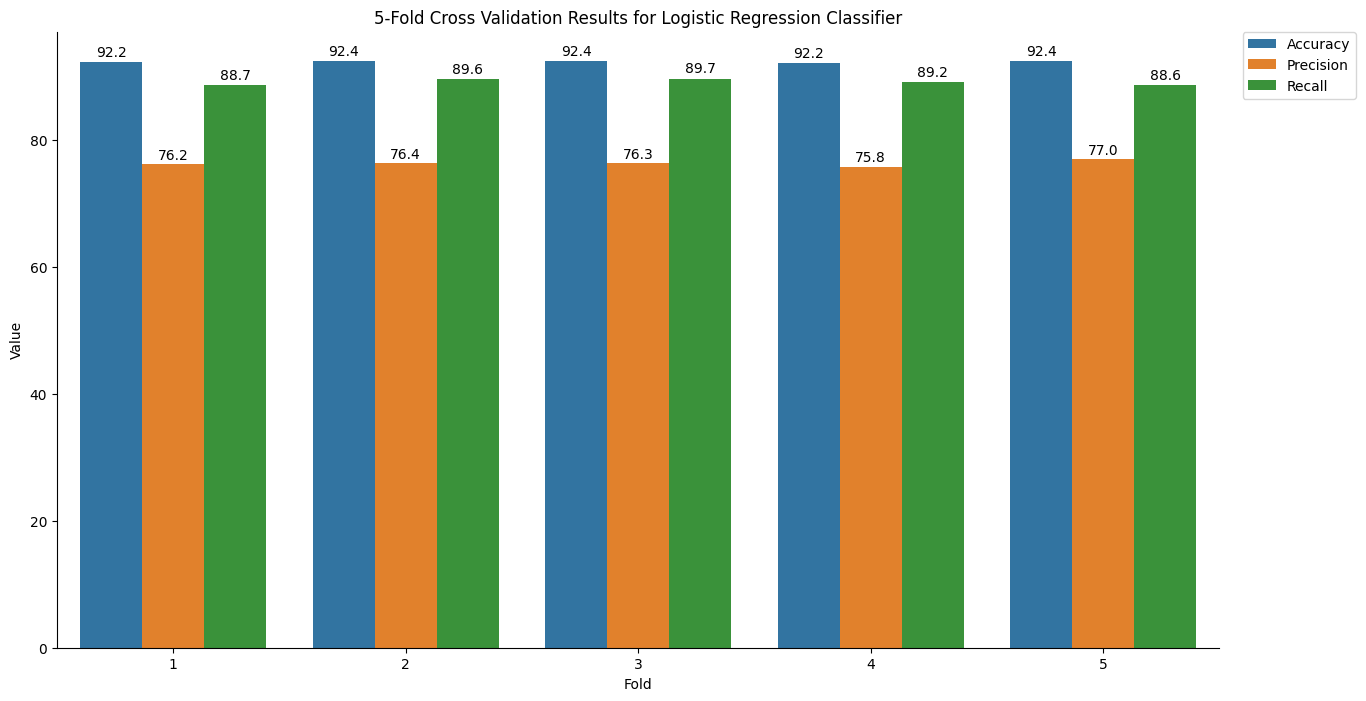

In [45]:
# plotting the accuracy results of each algorithm
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Support Vector Classifier
iter_data = pd.DataFrame({
    'Fold': [1, 2, 3, 4, 5],
    'Accuracy': list(lr_clf_score['Validation Accuracy scores']*100),
    'Precision': list(lr_clf_score['Validation Precision scores']*100),
    'Recall': list(lr_clf_score['Validation Recall scores']*100)
})

fig, ax1 = plt.subplots(figsize=(15, 8))
tidy = iter_data.melt(id_vars='Fold').rename(columns=str.title)
sns.barplot(x='Fold', y='Value', hue='Variable', data=tidy, ax=ax1).set(title='5-Fold Cross Validation Results for Logistic Regression Classifier')

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
sns.despine(fig)
show_values(ax1)

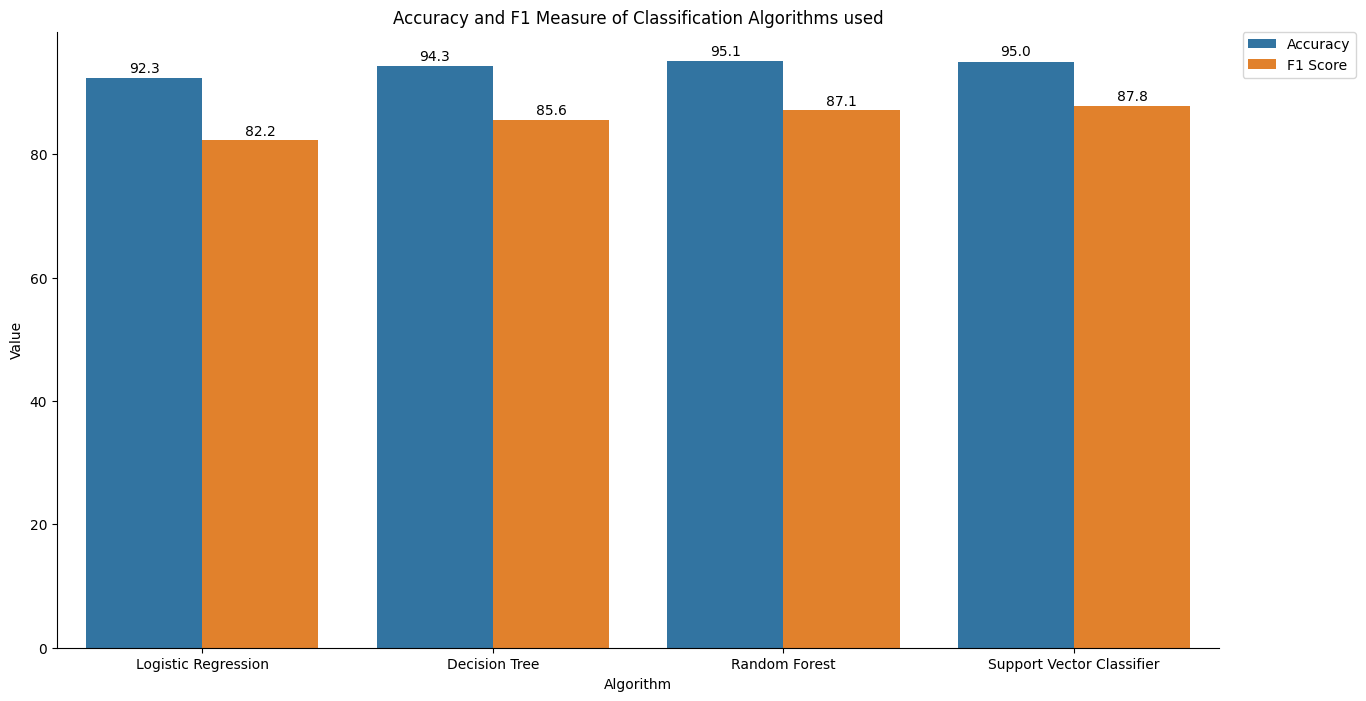

In [50]:
# plotting accuracy and f1 score for each algorithm
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

algo_data = pd.DataFrame({
    'Algorithm': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Support Vector Classifier'],
    'Accuracy': [lr_clf_score['Mean Validation Accuracy'], dt_clf_score['Mean Validation Accuracy'], rt_clf_score['Mean Validation Accuracy'], svc_clf_score['Mean Validation Accuracy']],
    'F1 Score': [lr_clf_score['Mean Validation F1 Score']*100, dt_clf_score['Mean Validation F1 Score']*100, rt_clf_score['Mean Validation F1 Score']*100, svc_clf_score['Mean Validation F1 Score']*100]
})

fig2, ax2 = plt.subplots(figsize=(15,8))
tidy = algo_data.melt(id_vars='Algorithm').rename(columns=str.title)
sns.barplot(x='Algorithm', y='Value', hue='Variable', data=tidy, ax=ax2).set(title='Accuracy and F1 Measure of Classification Algorithms used')

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
sns.despine(fig2)
show_values(ax2)

In [51]:
import pandas as pd
test_data = pd.read_csv('/content/train.csv')

In [56]:
test_data.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [55]:
test_data.drop('id', axis=1, inplace=True)

In [61]:
def is_offensive(row):
    if row['toxic'] == 1 or row['severe_toxic'] == 1 or row['obscene'] == 1 or row['threat'] == 1 or row['insult'] == 1 or row['identity_hate'] == 1:
        return 1
    return 0

In [62]:
test_data['is_offensive'] = test_data.apply(lambda row:is_offensive(row), axis=1)

In [65]:
test_data.shape[0]

159571

In [64]:
test_data['is_offensive'].sum()

16225

In [94]:
%%time
X_test_data = vectorizer.transform(test_data['comment_text'].astype('str'))
y_test_data = test_data['is_offensive']

CPU times: user 8.05 s, sys: 19 ms, total: 8.07 s
Wall time: 8.11 s


In [95]:
%%time
lr_clf.fit(X, y)

CPU times: user 6min 34s, sys: 273 ms, total: 6min 35s
Wall time: 6min 34s


LogisticRegression(class_weight='balanced', max_iter=1000000, solver='saga')

In [96]:
%%time
from sklearn.metrics import classification_report
lr_report = classification_report(y_test_data, lr_clf.predict(X_test_data))

CPU times: user 250 ms, sys: 290 µs, total: 250 ms
Wall time: 249 ms


In [97]:
print(lr_report)

              precision    recall  f1-score   support

           0       0.98      0.95      0.96    143346
           1       0.63      0.79      0.70     16225

    accuracy                           0.93    159571
   macro avg       0.80      0.87      0.83    159571
weighted avg       0.94      0.93      0.94    159571



In [98]:
%%time
dt_clf.fit(X, y)

CPU times: user 2min 29s, sys: 129 ms, total: 2min 30s
Wall time: 2min 30s


DecisionTreeClassifier(min_samples_split=5)

In [99]:
%%time
from sklearn.metrics import classification_report
dt_report = classification_report(y_test_data, dt_clf.predict(X_test_data))

CPU times: user 584 ms, sys: 2.09 ms, total: 586 ms
Wall time: 587 ms


In [100]:
print(dt_report)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    143346
           1       0.99      0.94      0.96     16225

    accuracy                           0.99    159571
   macro avg       0.99      0.97      0.98    159571
weighted avg       0.99      0.99      0.99    159571



In [101]:
%%time
rf_clf.fit(X, y)

CPU times: user 6min 40s, sys: 420 ms, total: 6min 41s
Wall time: 6min 40s


RandomForestClassifier(n_estimators=50)

In [102]:
%%time
from sklearn.metrics import classification_report
rf_report = classification_report(y_test_data, rf_clf.predict(X_test_data))

CPU times: user 10.4 s, sys: 16.9 ms, total: 10.5 s
Wall time: 10.5 s


In [103]:
print(rf_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    143346
           1       1.00      0.99      0.99     16225

    accuracy                           1.00    159571
   macro avg       1.00      1.00      1.00    159571
weighted avg       1.00      1.00      1.00    159571



In [104]:
%%time
svc_clf.fit(X, y)

CPU times: user 5min 45s, sys: 4min 27s, total: 10min 13s
Wall time: 5min 40s


LinearSVC(class_weight='balanced', dual=False, max_iter=100000, tol=0.01)

In [105]:
%%time
from sklearn.metrics import classification_report
svc_report = classification_report(y_test_data, svc_clf.predict(X_test_data))

CPU times: user 268 ms, sys: 43.6 ms, total: 311 ms
Wall time: 268 ms


In [106]:
print(svc_report)

              precision    recall  f1-score   support

           0       0.99      0.98      0.98    143346
           1       0.82      0.89      0.85     16225

    accuracy                           0.97    159571
   macro avg       0.91      0.93      0.92    159571
weighted avg       0.97      0.97      0.97    159571

